In [1]:
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt


#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Scalling
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler,MaxAbsScaler


##
from sklearn.preprocessing import Normalizer,Binarizer




#Data encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Data Splitting
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Regressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge, BayesianRidge, ElasticNet, HuberRegressor,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
##Polynomial
from sklearn.preprocessing import PolynomialFeatures as PF


##Pipeline
from sklearn.pipeline import make_pipeline

#statistic
from scipy import stats


import warnings 
warnings.filterwarnings("ignore")

## Deskripsi mengenai kolom  

- url         : Alamat website restoran             
- address     : Detail alamat dimana restoran berada
- name        : Nama restoran                 
- online_order :   Mengetahui apakah restoran menyediakan layanan booking pemesanan makanan secara online atau tidak        - book_table  :  Ketersediaan restoran dalam menyediakan reservasi makan ditempat                
- rate   :  Angka penilaian restoran yang diberikan oleh konsumen dengan nilai maks 5            
- votes  :  Total dari rating yang diberikan oleh konsumen                   
- phone  : Nomor telfon restoran                      
- location : Area dimana restoran berada                   
- rest_type : Tipe restoran
- dish_liked : Makanan yang paling disukai konsumen pada tiap restoran                 
- cuisines : Jenis masakan, biasanya dihubungkan dengan masakan khas suatu daerah               
- approx_cost(for two people) : Perkiraan harga makanan untuk dua orang 
- reviews_list : Testimoni pengunjung                
- menu_item : List yang berisi menu makanan                   
- listed_in(type) : Jenis pelayanan restoran, seperti Buffet, caffe             
- listed_in(city)  : Menjelaskan dimana restoran yang ingin didaftarkan, misalnya Resto A Cabang Banashankari ingin didaftarkan oleh Resto A Cabang Jayanager maka listed in city adalah Jayanager



## 1. Cleaning Data

In [2]:
data = pd.read_csv("zomato.csv")

In [3]:
df= data.copy()

#### Mengecek null value seluruh feature

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#### Mengecek presentase null value pada semua feature

In [5]:
pd.DataFrame(round(df.isnull().sum()/df.shape[0] *100,3), columns= ['Missing Value Percentage'])

,Missing Value Percentage
url,0.000
address,0.000
name,0.000
online_order,0.000
book_table,0.000
rate,15.034
votes,0.000
phone,2.336
location,0.041
rest_type,0.439


#### Mengecek jumlah null value pada tiap feature

In [6]:
df.isna().sum().sort_values()

url                                0
menu_item                          0
reviews_list                       0
listed_in(type)                    0
votes                              0
listed_in(city)                    0
book_table                         0
online_order                       0
name                               0
address                            0
location                          21
cuisines                          45
rest_type                        227
approx_cost(for two people)      346
phone                           1208
rate                            7775
dish_liked                     28078
dtype: int64

In [7]:

pd.DataFrame({'Column Name': df.columns, 'DataType': df.dtypes,
             'Total Null Value': df.isna().sum(),'unique': df.nunique(),
              'sample unique values': [list(df[i].drop_duplicates().sample(1))for i in df.columns]}).reset_index(drop=True)

,Column Name,DataType,Total Null Value,unique,sample unique values
0,url,object,0,51717,[https://www.zomato.com/bangalore/night-spoon-...
1,address,object,0,11495,"[19th Cross, Kaggadaspura Main Road, Near Rail..."
2,name,object,0,8792,[Malabar Kitchen]
3,online_order,object,0,2,[No]
4,book_table,object,0,2,[No]
5,rate,object,7775,64,[4.2 /5]
6,votes,int64,0,2328,[1922]
7,phone,object,1208,14926,[080 48146796]
8,location,object,21,93,[Brookefield]
9,rest_type,object,227,93,"[Cafe, Food Court]"


#### Drop null value pada feature ``rate``  sebesar 15% dari keseluruhan data


In [8]:
df = df.dropna(axis=0,subset=['rate'])

#### Drop null value pada feature ``cuisines``  sebanyak 45 row dari keseluruhan data


In [9]:
df = df.dropna(axis=0,subset=['cuisines'])

#### Mengganti nama kolom

In [10]:
df.columns = ['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'cost_two_person', 'reviews_list', 'menu_item',
       'service_type', 'registered_city']

##### Merubah nilai rating yang 'NEW' menjadi nol dan "-" menjadi np.nan (data kosong)

In [11]:
df['rate'].replace('NEW','0', inplace=True)

In [12]:
df['rate'].replace("-",np.nan,inplace=True)

##### Menghapus /5 pada rating

In [13]:
df['rate'] = df['rate'].astype('str')

In [14]:
df['rate'] = df['rate'].apply(lambda x: x.split("/")[0])

In [15]:
#sebelah paling kanan terdapat spasi dihapus
df['rate'] = df['rate'].str.rstrip()

##### Mengubah tipe data rating dari string to float

In [16]:
df['rate'] = df['rate'].astype('float')

#### Merubah feature `cost_two_person` datatype menjadi float

In [17]:
df['cost_two_person'] = df[~(df['cost_two_person'].isna())]['cost_two_person'].apply(lambda x: x.split(","))

In [18]:
df['cost_two_person'] = df[~(df['cost_two_person'].isna())]['cost_two_person'].apply(lambda x: "".join(x))

In [19]:
df['cost_two_person'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', nan, '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [20]:
df['cost_two_person'] = df['cost_two_person'].astype("float")

In [21]:
df.dropna(subset=['cost_two_person'],inplace=True)

In [22]:
cols = ['url','address','phone','name','reviews_list','menu_item','registered_city','dish_liked']
df = df.drop(cols,axis=1)

#### Handling Duplicate Value

##### Ketika dilakukan check duplicates terdapat indikasi duplicates rows tetapi ada kemungkinan bahwa restoran name sampai dengan rating memiliki informasi yang sama namun memiliki url yang berbeda dan dapat diasumsikan bahwa restaurant tersebut merupakan restaurant yang sama namun pada saat meng-update url restaurant, sistem zomato tidak mereplace url, melainkan sistem hanya mengintegrasikan data lainnya.

In [23]:

pd.DataFrame({'Column Name': df.columns, 'DataType': df.dtypes,
             'Total Null Value': df.isna().sum(),'unique': df.nunique(),
              'sample unique values': [list(df[i].drop_duplicates().sample(1))for i in df.columns]}).reset_index(drop=True)

,Column Name,DataType,Total Null Value,unique,sample unique values
0,online_order,object,0,2,[Yes]
1,book_table,object,0,2,[No]
2,rate,float64,65,32,[nan]
3,votes,int64,0,2323,[3823]
4,location,object,0,92,[Peenya]
5,rest_type,object,149,87,"[Cafe, Bakery]"
6,cuisines,object,0,2495,"[Fast Food, Italian, Beverages]"
7,cost_two_person,float64,0,66,[1350.0]
8,service_type,object,0,7,[Delivery]


## 3. Machine Learning

#### Pertimbangan Drop Column untuk Manchine Learning

- URL : Drop, karena tidak memiliki korelasi yang kuat, contohnya pengaruh domain website sebuah restaurant terhadap ratinng
- Phone : Drop, karena tidak memiliki korelasi yang kuat, contohnya pengaruh Nomor handphone dengan kombinasi nomor yang mudah dihafal terhadap ratinng
- Address : Drop, karena adanya kolom location pada dataframe 
- Name : Semantic Anylisis, berisi tentang analasis kata yang tidak berhubungan dengan Manchine Learning

- Review_list : Banyaknya null value dengan lebih presentase 50%, berisi Rating dan Testimoni restoran yang tidak sesuai dengan machine learning yang diterapkan
- Menu_Item : Banyaknya null value dengan presentase lebih dari 50% 
- Listed_in_City : Nama restaurant yang mendaftarkan restaurant yang sama namum memiliki cabang yang berbeda
- dish_liked : Banyaknya null value dengan presentase lebih dari 50%


In [24]:
df['rate'].isna().sum()

65

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43682 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   online_order     43682 non-null  object 
 1   book_table       43682 non-null  object 
 2   rate             43617 non-null  float64
 3   votes            43682 non-null  int64  
 4   location         43682 non-null  object 
 5   rest_type        43533 non-null  object 
 6   cuisines         43682 non-null  object 
 7   cost_two_person  43682 non-null  float64
 8   service_type     43682 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.3+ MB


### Labeling feauture ``Cuisines``

In [26]:
df['cuisines'] = df['cuisines'].apply(lambda x : [i.strip() for i in str(x).split(',')])
x = []
for i in df['cuisines'].values:
    for n in i:
        x.append(n)
    x = list(np.unique(x))
print(x)
for i in x:
    df[i] = 0
for i,v in df['cuisines'].items():
    for n in v:
        df.loc[i,n] = 1

['Afghan', 'Afghani', 'African', 'American', 'Andhra', 'Arabian', 'Asian', 'Assamese', 'Australian', 'Awadhi', 'BBQ', 'Bakery', 'Bar Food', 'Belgian', 'Bengali', 'Beverages', 'Bihari', 'Biryani', 'Bohri', 'British', 'Bubble Tea', 'Burger', 'Burmese', 'Cafe', 'Cantonese', 'Charcoal Chicken', 'Chettinad', 'Chinese', 'Coffee', 'Continental', 'Desserts', 'Drinks Only', 'European', 'Fast Food', 'Finger Food', 'French', 'German', 'Goan', 'Greek', 'Grill', 'Gujarati', 'Healthy Food', 'Hot dogs', 'Hyderabadi', 'Ice Cream', 'Indian', 'Indonesian', 'Iranian', 'Italian', 'Japanese', 'Jewish', 'Juices', 'Kashmiri', 'Kebab', 'Kerala', 'Konkan', 'Korean', 'Lebanese', 'Lucknowi', 'Maharashtrian', 'Malaysian', 'Mangalorean', 'Mediterranean', 'Mexican', 'Middle Eastern', 'Mithai', 'Modern Indian', 'Momos', 'Mongolian', 'Mughlai', 'Naga', 'Nepalese', 'North Eastern', 'North Indian', 'Oriya', 'Paan', 'Pan Asian', 'Parsi', 'Pizza', 'Portuguese', 'Rajasthani', 'Raw Meats', 'Roast Chicken', 'Rolls', 'Russia

In [27]:
df.head(3)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_two_person,service_type,Afghan,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"[North Indian, Mughlai, Chinese]",800.0,Buffet,0,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,4.1,787,Banashankari,Casual Dining,"[Chinese, North Indian, Thai]",800.0,Buffet,0,...,0,0,0,0,1,0,0,0,0,0
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","[Cafe, Mexican, Italian]",800.0,Buffet,0,...,0,0,0,0,0,0,0,0,0,0


### Labeling feauture ``rest_type``

In [28]:
df['rest_type'] = df['rest_type'].apply(lambda x : [i.strip() for i in str(x).split(',')])
ax = []
for i in df['rest_type'].values:
    for n in i:
        ax.append(n)
    ax = list(np.unique(ax))
print(ax)
for i in ax:
    df[i] = 0
for i,v in df['rest_type'].items():
    for n in v:
        df.loc[i,n] = 1

['Bakery', 'Bar', 'Beverage Shop', 'Bhojanalya', 'Cafe', 'Casual Dining', 'Club', 'Confectionery', 'Delivery', 'Dessert Parlor', 'Dhaba', 'Fine Dining', 'Food Court', 'Food Truck', 'Irani Cafee', 'Kiosk', 'Lounge', 'Meat Shop', 'Mess', 'Microbrewery', 'Pub', 'Quick Bites', 'Sweet Shop', 'Takeaway', 'nan']


In [29]:
print(ax)

['Bakery', 'Bar', 'Beverage Shop', 'Bhojanalya', 'Cafe', 'Casual Dining', 'Club', 'Confectionery', 'Delivery', 'Dessert Parlor', 'Dhaba', 'Fine Dining', 'Food Court', 'Food Truck', 'Irani Cafee', 'Kiosk', 'Lounge', 'Meat Shop', 'Mess', 'Microbrewery', 'Pub', 'Quick Bites', 'Sweet Shop', 'Takeaway', 'nan']


In [30]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_two_person,service_type,Afghan,...,Kiosk,Lounge,Meat Shop,Mess,Microbrewery,Pub,Quick Bites,Sweet Shop,Takeaway,nan
0,Yes,Yes,4.1,775,Banashankari,[Casual Dining],"[North Indian, Mughlai, Chinese]",800.0,Buffet,0,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,4.1,787,Banashankari,[Casual Dining],"[Chinese, North Indian, Thai]",800.0,Buffet,0,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,3.8,918,Banashankari,"[Cafe, Casual Dining]","[Cafe, Mexican, Italian]",800.0,Buffet,0,...,0,0,0,0,0,0,0,0,0,0
3,No,No,3.7,88,Banashankari,[Quick Bites],"[South Indian, North Indian]",300.0,Buffet,0,...,0,0,0,0,0,0,1,0,0,0
4,No,No,3.8,166,Basavanagudi,[Casual Dining],"[North Indian, Rajasthani]",600.0,Buffet,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.head(3)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_two_person,service_type,Afghan,...,Kiosk,Lounge,Meat Shop,Mess,Microbrewery,Pub,Quick Bites,Sweet Shop,Takeaway,nan
0,Yes,Yes,4.1,775,Banashankari,[Casual Dining],"[North Indian, Mughlai, Chinese]",800.0,Buffet,0,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,4.1,787,Banashankari,[Casual Dining],"[Chinese, North Indian, Thai]",800.0,Buffet,0,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,3.8,918,Banashankari,"[Cafe, Casual Dining]","[Cafe, Mexican, Italian]",800.0,Buffet,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df['online_order'] = LabelEncoder().fit_transform(df['online_order'])
df['book_table'] = LabelEncoder().fit_transform(df['book_table'])
df['location'] = LabelEncoder().fit_transform(df['location'])
df['service_type'] = LabelEncoder().fit_transform(df['service_type'])


In [33]:
df.head(3)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_two_person,service_type,Afghan,...,Kiosk,Lounge,Meat Shop,Mess,Microbrewery,Pub,Quick Bites,Sweet Shop,Takeaway,nan
0,1,1,4.1,775,1,[Casual Dining],"[North Indian, Mughlai, Chinese]",800.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,1,[Casual Dining],"[Chinese, North Indian, Thai]",800.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,1,"[Cafe, Casual Dining]","[Cafe, Mexican, Italian]",800.0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

### Preparing Dataset

In [34]:
df.drop(['rest_type','cuisines'],axis=1,inplace=True)

In [35]:
df.shape

(43682, 136)

In [36]:
df.dropna(inplace=True)

In [37]:
df.shape

(43617, 136)

In [38]:
x = df.drop(['rate'],axis=1)
y = df['rate']

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



In [40]:
y_train.isna().sum()

0

In [41]:
rfr = RandomForestRegressor(random_state=42)
lnr = LinearRegression()
dct = DecisionTreeRegressor(random_state=42)

rfr.fit(x_train,y_train)
lnr.fit(x_train,y_train)
dct.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [42]:
rfr_y_train_predict = rfr.predict(x_train)
rfr_y_test_predict = rfr.predict(x_test)
lnr_y_train_predict = lnr.predict(x_train)
lnr_y_test_predict = lnr.predict(x_test)
dct_y_train_predict = dct.predict(x_train)
dct_y_test_predict = dct.predict(x_test)


In [43]:
RandomForest_Result = pd.DataFrame({'Dataset': ['Random Forest Regressor'], 
              'CV error': [ (cross_val_score(rfr, x, y, scoring='neg_root_mean_squared_error',cv=5).mean())],
              'CV std': [ (cross_val_score(rfr, x, y, scoring='neg_root_mean_squared_error',cv=5).std())],
              'Training Error' : [np.sqrt(mean_squared_error(y_train, rfr_y_train_predict))],
              'Test Error' : [np.sqrt(mean_squared_error(y_test, rfr_y_test_predict))],
              'Training_R2_Score' : [r2_score(y_train, rfr_y_train_predict)],
              'Test_R2_Score' : [r2_score(y_test, rfr_y_test_predict)]
             }).set_index('Dataset')
RandomForest_Result

,CV error,CV std,Training Error,Test Error,Training_R2_Score,Test_R2_Score
Dataset,,,,,,
Random Forest Regressor,-0.171532,0.041982,0.064235,0.148706,0.995152,0.972566


In [44]:
cross_val_score(rfr, x, y, scoring='r2',cv=5)

array([0.97125456, 0.96733023, 0.93861589, 0.98690222, 0.94701334])

In [45]:
MultiLinearRegression_Result = pd.DataFrame({'Dataset': ['Multi Linear Regression'], 
              'CV error': [ (cross_val_score(lnr, x, y, scoring='neg_root_mean_squared_error',cv=5).mean())],
              'CV std': [ (cross_val_score(lnr, x, y, scoring='neg_root_mean_squared_error',cv=5).std())],
              'Training Error' : [np.sqrt(mean_squared_error(y_train, lnr_y_train_predict))],
              'Test Error' : [np.sqrt(mean_squared_error(y_test, lnr_y_test_predict))],
              'Training_R2_Score' : [r2_score(y_train, lnr_y_train_predict)],
              'Test_R2_Score' : [r2_score(y_test, lnr_y_test_predict)]
             }).set_index('Dataset')
MultiLinearRegression_Result

,CV error,CV std,Training Error,Test Error,Training_R2_Score,Test_R2_Score
Dataset,,,,,,
Multi Linear Regression,-0.841867,0.078162,0.84286,0.824947,0.165326,0.155732


In [46]:
cross_val_score(lnr, x, y, scoring='r2',cv=5)

array([0.1314613 , 0.15060181, 0.12603593, 0.17091737, 0.1695498 ])

In [47]:
DecisionTree_Result = pd.DataFrame({'Dataset': ['Decision Tree Regression'], 
              'CV error': [ (cross_val_score(dct, x, y, scoring='neg_root_mean_squared_error',cv=5).mean())],
              'CV std': [ (cross_val_score(dct, x, y, scoring='neg_root_mean_squared_error',cv=5).std())],
              'Training Error' : [np.sqrt(mean_squared_error(y_train, dct_y_train_predict))],
              'Test Error' : [np.sqrt(mean_squared_error(y_test, dct_y_test_predict))],
              'Training_R2_Score' : [r2_score(y_train, dct_y_train_predict)],
              'Test_R2_Score' : [r2_score(y_test, dct_y_test_predict)]
             }).set_index('Dataset')
DecisionTree_Result

,CV error,CV std,Training Error,Test Error,Training_R2_Score,Test_R2_Score
Dataset,,,,,,
Decision Tree Regression,-0.229016,0.058152,0.043115,0.180701,0.997816,0.959491


In [48]:
cross_val_score(dct, x, y, scoring='r2',cv=5)

array([0.94485139, 0.93254492, 0.90384889, 0.98107503, 0.90139569])

In [49]:
Result = pd.concat([RandomForest_Result, MultiLinearRegression_Result, DecisionTree_Result], axis=0)
Result

,CV error,CV std,Training Error,Test Error,Training_R2_Score,Test_R2_Score
Dataset,,,,,,
Random Forest Regressor,-0.171532,0.041982,0.064235,0.148706,0.995152,0.972566
Multi Linear Regression,-0.841867,0.078162,0.842860,0.824947,0.165326,0.155732
Decision Tree Regression,-0.229016,0.058152,0.043115,0.180701,0.997816,0.959491


## Hypertuning Parameter

In [50]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop=2000,num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

param = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

In [51]:
tuning_rfr = RandomizedSearchCV(estimator=rfr, param_distributions=param, cv=5)

In [52]:
tuning_rfr.fit(x_train, y_train)
print(tuning_rfr.best_params_)

{'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}


In [56]:
rfr_rs = RandomForestRegressor(n_estimators= 1800, min_samples_split= 2, min_samples_leaf= 1, max_features='sqrt',max_depth= 90, bootstrap= False,random_state=42)
rfr_rs.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=90, max_features='sqrt',
                      n_estimators=1800, random_state=42)

In [57]:
rfr_rs_y_train_predict = rfr_rs.predict(x_train)
rfr_rs_y_test_predict = rfr_rs.predict(x_test)

In [58]:
RandomForest_Tuning_Result = pd.DataFrame({'Dataset': ['Random Forest Regressor Tuned'], 
              'CV error': [ (cross_val_score(rfr_rs, x, y, scoring='neg_root_mean_squared_error',cv=5).mean())],
              'CV std': [ (cross_val_score(rfr_rs, x, y, scoring='neg_root_mean_squared_error',cv=5).std())],
              'Training Error' : [np.sqrt(mean_squared_error(y_train, rfr_rs_y_train_predict))],
              'Test Error' : [np.sqrt(mean_squared_error(y_test, rfr_rs_y_test_predict))],
              'Training_R2_Score' : [r2_score(y_train, rfr_rs_y_train_predict)],
              'Test_R2_Score' : [r2_score(y_test, rfr_rs_y_test_predict)]
             }).set_index('Dataset')
RandomForest_Tuning_Result

,CV error,CV std,Training Error,Test Error,Training_R2_Score,Test_R2_Score
Dataset,,,,,,
Random Forest Regressor Tuned,-0.182244,0.046302,0.043115,0.160663,0.997816,0.967977


---

## Final Dataframe

In [59]:
final_df = pd.DataFrame({'Actual Rate' : np.array(y_test).flatten(),
                        'Predicted Rate' : np.array(rfr_y_test_predict).flatten()
                        }).head(50)
final_df.head(5)

,Actual Rate,Predicted Rate
0,3.5,3.282
1,3.2,3.235
2,3.3,3.323
3,3.5,3.464
4,3.5,3.408


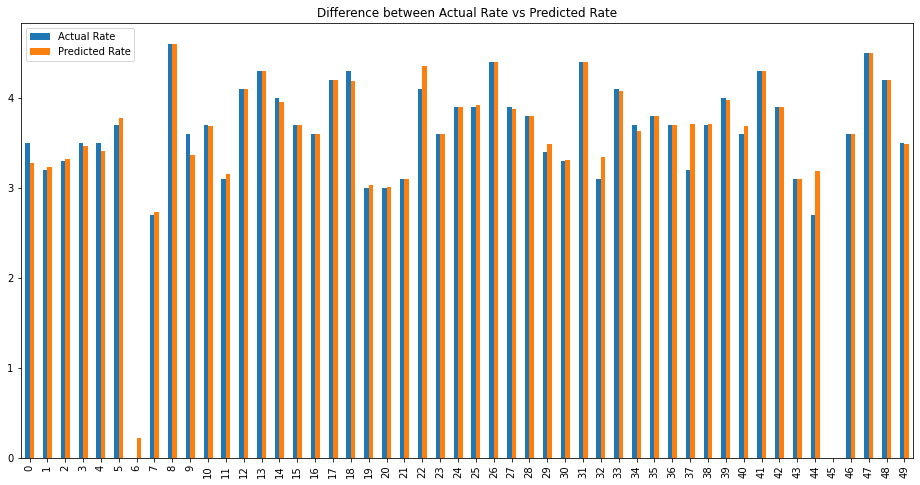

In [60]:
final_df.plot(kind='bar', figsize=(16,8))
plt.title('Difference between Actual Rate vs Predicted Rate')
plt.show()